### exercise 5: dimension reduction

### task 2: partial least squares 

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline

from matplotlib import pyplot as plt
from operator import itemgetter

%matplotlib inline
plt.style.use('ggplot') # emulate R's pretty plotting

# print numpy arrays with precision 4
np.set_printoptions(precision=4)

In [2]:
hitters = pd.read_csv(r'C:\Users\Chijun Zhang\Documents\jupyter\machine learning exercise\datasets\Hitters.csv', index_col=0).dropna()
dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])
hitters = hitters.drop(['League', 'Division', 'NewLeague'], axis=1)
hitters = pd.concat([hitters, dummies[['League_N', 'Division_W', 'NewLeague_N']]],axis=1)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [3]:
X = hitters.drop('Salary', axis = 1).values
y = hitters.Salary.values

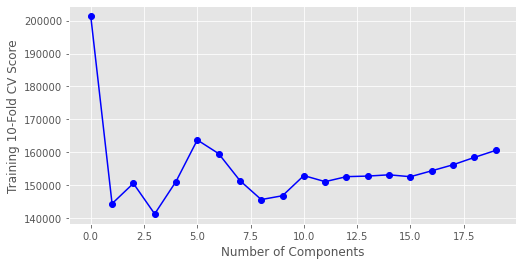

In [4]:
np.random.seed(4)

train = np.random.choice([True, False], size=len(hitters))

X_train = X[train]
y_train = y[train]
X_test = X[~train]
y_test = y[~train]

scores = []

num_components = list(np.arange(1,X_train.shape[1]+1))
num_samples = X_train.shape[0]

sc=cross_validate(LinearRegression(), np.ones((num_samples,1)), y_train,cv=10, scoring = 'neg_mean_squared_error')
scores.append(np.mean(sc['test_score']) * -1)

#scores.append(-np.mean(cross_val_score(LinearRegression(), np.ones((num_samples,1)), y_train,
                                        #cv=10, scoring = 'mean_squared_error')))
for n in num_components:
    
    pls = PLSRegression(n_components=n, scale=False)
    
    model = Pipeline([('scaler', StandardScaler()), ('pls', pls)])
    
    model.fit(X_train,y_train)
    sc=cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
    scores.append(np.mean(sc['test_score']) * -1)
 
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(scores, marker='o', color='b');
ax.set_xlabel('Number of Components');
ax.set_ylabel('Training 10-Fold CV Score');
ax.set_xlim(xmin=-1);

In [5]:
pls = PLSRegression(n_components=3, scale=False)
    
model = Pipeline([('scaler', StandardScaler()), ('pls', pls)])
    
model.fit(X_train,y_train) 

y_predict=model.predict(X_test)

MSE = np.mean((y_predict-y_test)**2)
print(MSE)

305611.04630132514
